# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories;
from make_json import parameter_names;
import json
from env_lite import Environment
from model import NN

Neighboring files:
Removed JSON file: BG_INTACT_DAYS/parameters_40.json
Removed JSON file: BG_INTACT_DAYS/parameters_50.json
Removed JSON file: BG_INTACT_DAYS/parameters_60.json
Removed JSON file: BG_INTACT_DAYS/parameters_10.json
Removed JSON file: BG_INTACT_DAYS/parameters_20.json
Removed JSON file: BG_INTACT_DAYS/parameters_30.json
Directory: BG_INTACT_DAYS
Modified parameter 'params/BG_INTACT_DAYS' to 10 and saved to BG_INTACT_DAYS/parameters_10.json
Modified parameter 'params/BG_INTACT_DAYS' to 20 and saved to BG_INTACT_DAYS/parameters_20.json
Modified parameter 'params/BG_INTACT_DAYS' to 30 and saved to BG_INTACT_DAYS/parameters_30.json
Modified parameter 'params/BG_INTACT_DAYS' to 40 and saved to BG_INTACT_DAYS/parameters_40.json
Modified parameter 'params/BG_INTACT_DAYS' to 50 and saved to BG_INTACT_DAYS/parameters_50.json
Modified parameter 'params/BG_INTACT_DAYS' to 60 and saved to BG_INTACT_DAYS/parameters_60.json


In [2]:
wanted_directories = ["BG_INTACT_DAYS"] #["BG_NOISE", "LEARNING_RATE_RL", "REWARD_WINDOW", "LEARNING_RATE_HL","TARGET_WIDTH","ANNEALING", "JUMP_MID", "JUMP_SLOPE", "JUMP_FACTOR", "RA_SIG_SLOPE", "balance_factor","RA_NOISE"]#["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]                                       

In [3]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_b4cut = {}
data_aftercut = {}
data_end = {}
# data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_b4cutoff"):   
            filepath = os.path.join(directory, filename)
            data_b4cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_aftercutoff"):
            filepath = os.path.join(directory, filename)
            data_aftercut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_end"):
            filepath = os.path.join(directory, filename)
            data_end[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_b4cut.keys())
print(data_aftercut.keys())
print(data_end.keys())
print(parameter_values)

BG_INTACT_DAYS
dict_keys(['BG_INTACT_DAYS'])
dict_keys(['BG_INTACT_DAYS'])
dict_keys(['BG_INTACT_DAYS'])
{'BG_INTACT_DAYS': array([10., 50., 40., 20., 30., 60.])}


In [4]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [5]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

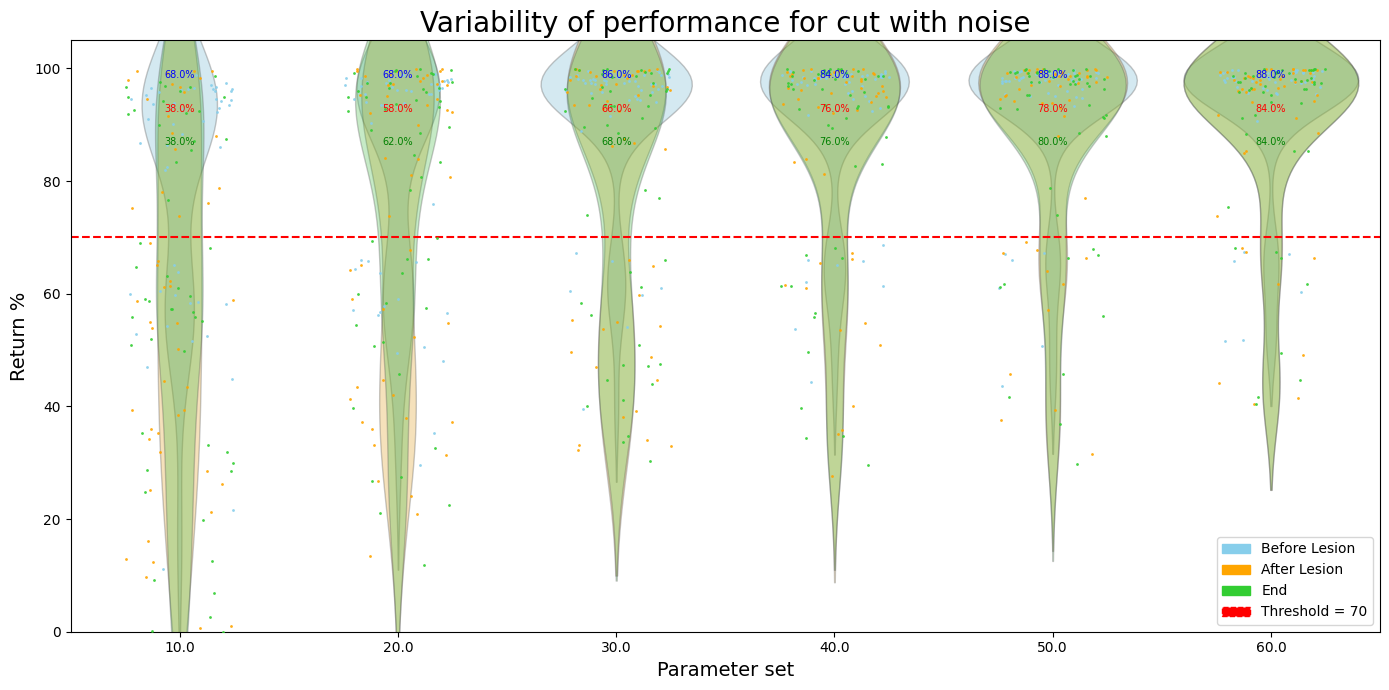

In [6]:
import seaborn as sns


def plot_results_violin_3(data1, data2, data3, params, label):
    # Scale returns to percentages
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    # Sort parameter values and corresponding data
    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]

    n_values = len(sorted_params)

    # Arrays to store fraction above threshold
    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    data_flat1, data_flat2, data_flat3 = [], [], []
    labels = []

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

        data_flat1.extend(col1)
        data_flat2.extend(col2)
        data_flat3.extend(col3)

        labels.extend([sorted_params[i]] * len(col1))  # Same label repeated

    # Start plotting
    plt.figure(figsize=(14, 7))

    # Plot violins (no label)
    sns.violinplot(x=labels, y=data_flat1, inner=None, color='skyblue', alpha=0.4, linewidth=1)
    sns.violinplot(x=labels, y=data_flat2, inner=None, color='orange', alpha=0.3, linewidth=1)
    sns.violinplot(x=labels, y=data_flat3, inner=None, color='limegreen', alpha=0.3, linewidth=1)

    # Plot stripplots (no label inside)
    sns.stripplot(x=labels, y=data_flat1, size=2, color='skyblue', alpha=0.9, jitter=0.25)
    sns.stripplot(x=labels, y=data_flat2, size=2, color='orange', alpha=0.9, jitter=0.25)
    sns.stripplot(x=labels, y=data_flat3, size=2, color='limegreen', alpha=0.9, jitter=0.25)

    # Threshold line
    plt.axhline(70, color='red', linestyle='--')

    # Annotate above threshold percentages
    for i in range(n_values):
        plt.text(i, 98, f"{100 * above_thresh1[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='blue')
        plt.text(i, 92, f"{100 * above_thresh2[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='red')
        plt.text(i, 86, f"{100 * above_thresh3[i]:.1f}%", ha='center', va='bottom', fontsize=7, color='green')

    # Manual legend
    import matplotlib.patches as mpatches
    legend_elements = [
        mpatches.Patch(color='skyblue', label='Before Lesion'),
        mpatches.Patch(color='orange', label='After Lesion'),
        mpatches.Patch(color='limegreen', label='End'),
        mpatches.Patch(color='red', label='Threshold = 70', linestyle='--')
    ]
    plt.legend(handles=legend_elements)

    # Labels etc
    plt.xlabel('Parameter set', fontsize=14)
    plt.ylabel('Return %', fontsize=14)
    plt.ylim(0, 105)
    plt.title(f"Variability of performance for {label} with noise", fontsize=20)

    plt.tight_layout()
    plt.show()


plot_results_violin_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut"
)


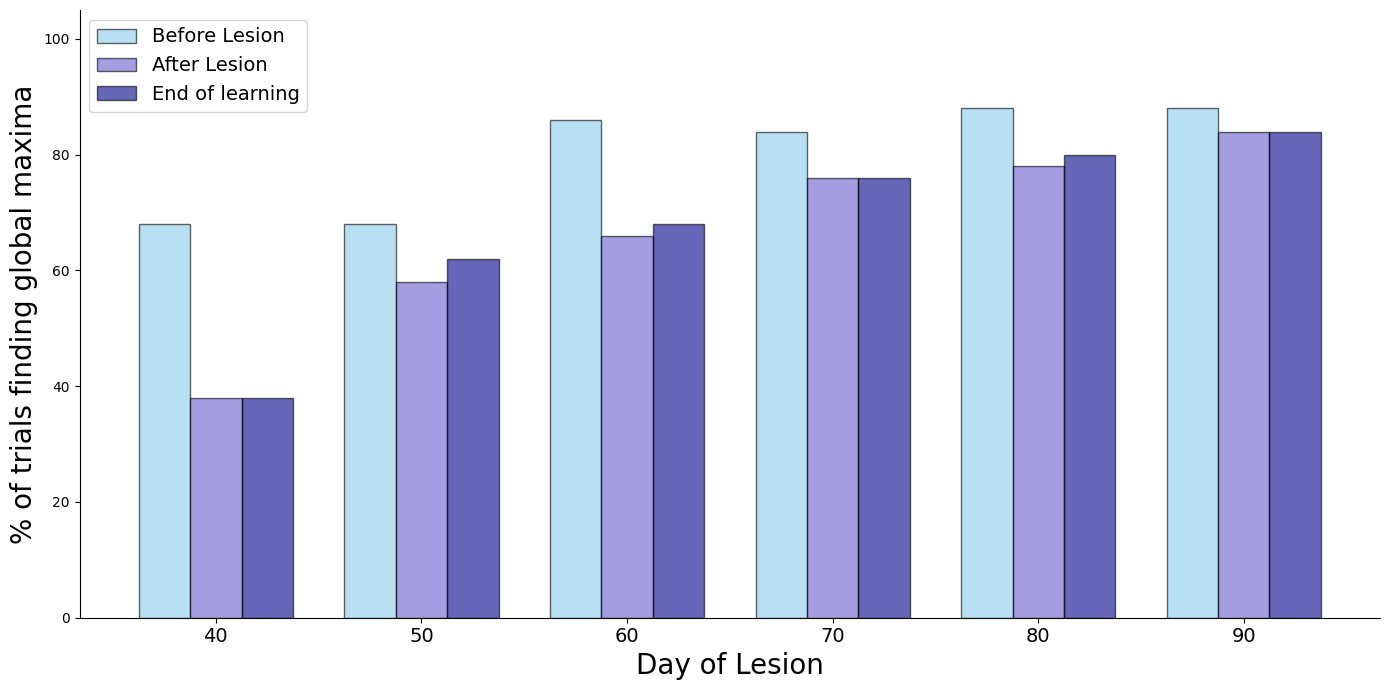

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results_bar_3(data1, data2, data3, params, label):
    # Scale returns to percentages
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    # Sort parameter values and corresponding data
    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]

    n_values = len(sorted_params)

    # Arrays to store fraction above threshold
    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

    # Start plotting
    plt.figure(figsize=(14, 7))

    bar_width = 0.25
    x = np.arange(n_values)

    plt.bar(x - bar_width, 100 * above_thresh1, width=bar_width, color='skyblue', alpha=0.6, edgecolor='black', label='Before Lesion')
    plt.bar(x,             100 * above_thresh2, width=bar_width, color='slateblue', alpha=0.6, edgecolor='black', label='After Lesion')
    plt.bar(x + bar_width, 100 * above_thresh3, width=bar_width, color='darkblue', alpha=0.6, edgecolor='black', label='End of learning')

    # plt.axhline(70, color='red', linestyle='--', label='Threshold = 70')

    # Labels and title
    plt.xlabel('Day of Lesion', fontsize=20)
    plt.ylabel('% of trials finding global maxima', fontsize=20)
    # plt.title(f"", fontsize=20)
    plt.xticks(x, [int(p+30) for p in sorted_params], fontsize =14)    
    # remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylim(0, 105)
    plt.legend(loc = 2, fontsize=14)
    plt.tight_layout()
    plt.show()


# Usage example:
plot_results_bar_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut"
)


In [8]:
with open('params.json', "r") as f:
    parameters = json.load(f)
    N_SYLL = parameters['params']['N_SYLL']
    TRIALS = parameters['params']['TRIALS']
    DAYS = parameters['params']['DAYS']

print(f"N_SYLL: {N_SYLL}, TRIALS: {TRIALS}, DAYS: {DAYS}")  

N_SYLL: 1, TRIALS: 1000, DAYS: 61


In [9]:
# def plot_rewards()


neighboring_directories = find_neighboring_directories()

# subplot len(parameter vals) rows =1, cols = len(parameter_values)
# for i, param in enumerate(parameter_values):
for directory in neighboring_directories:
    if directory in wanted_directories:
        # load parameters from json file
        nos_parameters = 0
        # print(f"Seeds: {seeds}")
        for potential_filename in os.listdir(directory):
            if potential_filename.startswith("parameters_") and potential_filename.endswith(".json"):
                nos_parameters += 1
        print(f"Number of parameters: {nos_parameters} for directory {directory}")
        param_order = np.zeros((nos_parameters))
        actions = np.zeros((nos_parameters, DAYS, TRIALS,1,2))
        rewards = np.zeros((nos_parameters, DAYS, TRIALS, 1))
        j = 0
        for potential_filename in (os.listdir(directory)):
            if potential_filename.startswith("parameters_") and potential_filename.endswith(".json"):
                print(f"Potential filename: {potential_filename} with index {j}")     
                if j >= nos_parameters:
                    print(f"Skipping file {potential_filename} as index {j} exceeds nos_parameters {nos_parameters}")
                    continue
                param = potential_filename.split("_")[1].split(".jso")[0]
                full_filename = os.path.join(directory, potential_filename)
                # load parameters from json file
                with open(full_filename, "r") as f:
                    parameters = json.load(f)
                    N_SYLL = parameters['params']['N_SYLL']
                    if N_SYLL != 1:
                        raise ValueError('nos syllables needs to be 1')
                    print(f"Opening JSON file: {full_filename}")
                    annealing_val = parameters['params']['ANNEALING']
                    obj = Environment(42, parameters, NN)
                    obj.run(parameters, True)
                    actions[j, :, :] = obj.actions
                    rewards[j, :] = obj.rewards 
                    param_order[j] = param
                    j += 1


Number of parameters: 6 for directory BG_INTACT_DAYS
Potential filename: parameters_40.json with index 0
Opening JSON file: BG_INTACT_DAYS/parameters_40.json


  3%|▎         | 2/61 [00:00<00:17,  3.41it/s]

100%|██████████| 61/61 [00:13<00:00,  4.50it/s]


Potential filename: parameters_50.json with index 1
Opening JSON file: BG_INTACT_DAYS/parameters_50.json


100%|██████████| 61/61 [00:13<00:00,  4.64it/s]


Potential filename: parameters_60.json with index 2
Opening JSON file: BG_INTACT_DAYS/parameters_60.json


100%|██████████| 61/61 [00:13<00:00,  4.65it/s]


Potential filename: parameters_10.json with index 3
Opening JSON file: BG_INTACT_DAYS/parameters_10.json


100%|██████████| 61/61 [00:13<00:00,  4.66it/s]


Potential filename: parameters_20.json with index 4
Opening JSON file: BG_INTACT_DAYS/parameters_20.json


100%|██████████| 61/61 [00:12<00:00,  4.73it/s]


Potential filename: parameters_30.json with index 5
Opening JSON file: BG_INTACT_DAYS/parameters_30.json


100%|██████████| 61/61 [00:12<00:00,  4.79it/s]


In [10]:
np.argsort(param_order)    

array([3, 4, 5, 0, 1, 2])

In [11]:
actions.shape, rewards.shape

((6, 61, 1000, 1, 2), (6, 61, 1000, 1))

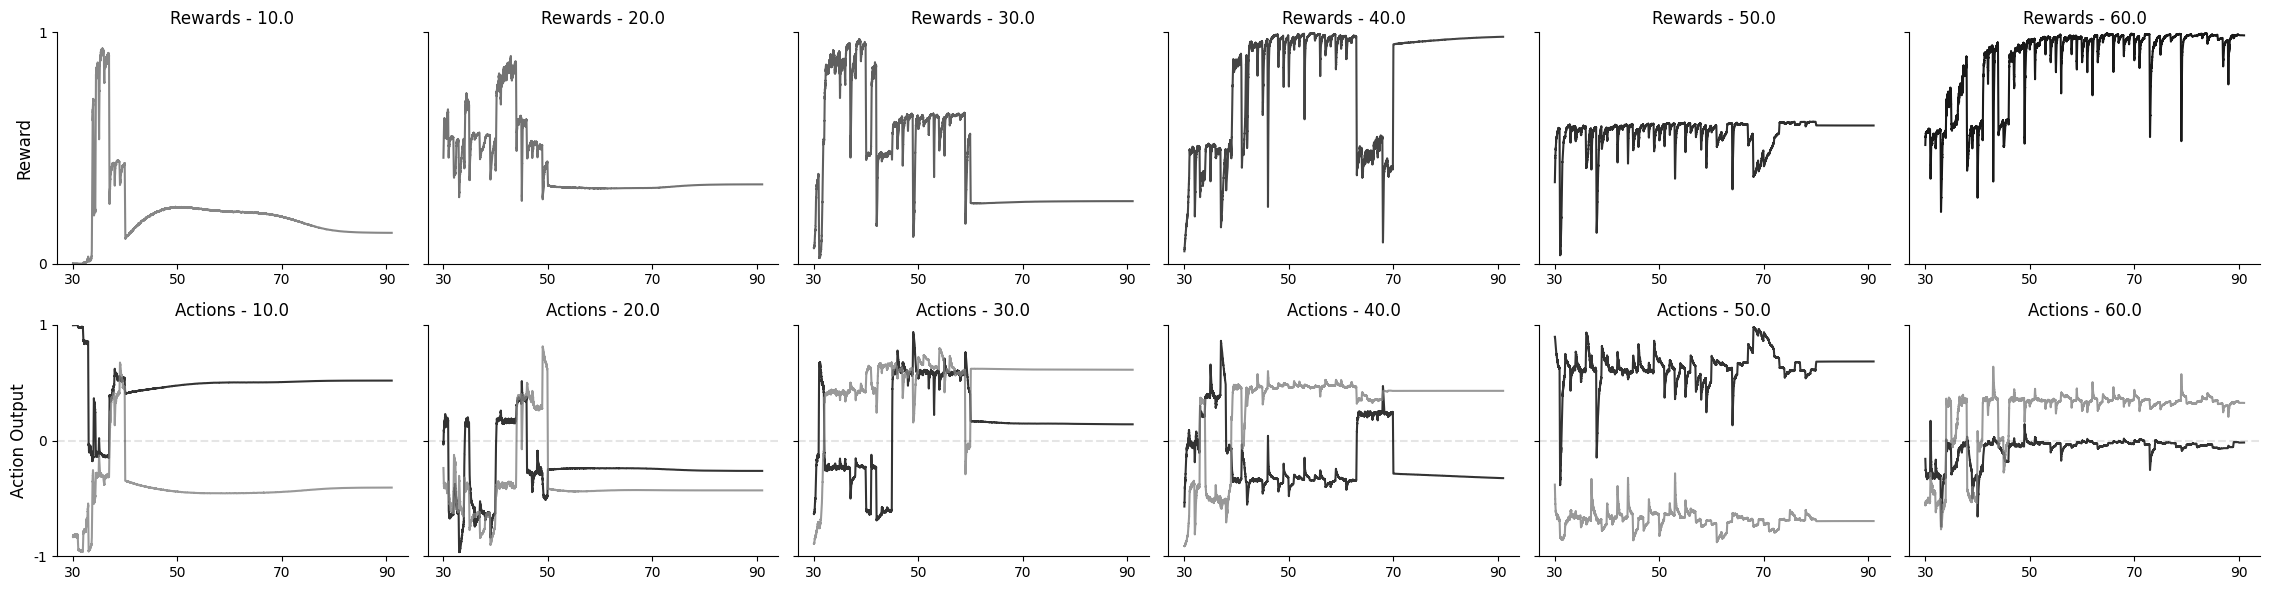

In [25]:

def running_mean(x, N=5):
        """ Returns the running average of an array. """
        rm = np.convolve(x, np.ones(N)/N, mode='valid')
        padded_rm = np.ones(np.shape(x)) * rm[-1]
        padded_rm[:rm.size] = rm

        return padded_rm

def plot_rewards_and_actions(rewards, actions, param_order, days, trials, n_daily_motifs=10, smoothing=100):
    num_params = len(param_order)
    cmap = plt.get_cmap('Greys')
    param_colors = [cmap(0.6 + 0.4 * i / max(1, num_params - 1)) for i in range(num_params)]
    LIMIT = 1.5

    rewards = rewards.squeeze()  # (params, days, trials)
    actions = actions.squeeze()  # (params, days, trials, 2)

    fig, axs = plt.subplots(2, num_params, figsize=(4 * num_params, 6), sharey='row')
    if num_params == 1:
        axs = np.expand_dims(axs, axis=1)  # Ensure consistent shape

    for i, param_idx in enumerate(np.argsort(param_order)):
        param_label = param_order[param_idx]

        # Flatten data
        reward_data = rewards[param_idx].reshape(-1)
        action_data = actions[param_idx].reshape(-1, 2)

        # Time axis in days
        time_axis = np.linspace(30, 30+days, days * trials)

        # Rewards panel
        smooth_reward = running_mean(reward_data, smoothing)
        axs[0, i].plot(time_axis[:len(smooth_reward)], smooth_reward, color=param_colors[i], lw=1.5, alpha=0.9)
        axs[0, i].set_ylim(0, 1)
        axs[0, i].set_yticks([0, 1])
        axs[0, i].spines['right'].set_visible(False)
        axs[0, i].spines['top'].set_visible(False)
        axs[0, i].set_title(f"Rewards - {param_label}", fontsize=12)
        axs[0, i].tick_params(labelsize=10)
        axs[0, i].set_xticks(30+np.arange(0, days + 1, 20))

        # Actions panel
        smooth_x = running_mean(action_data[:, 0], smoothing)
        smooth_y = running_mean(action_data[:, 1], smoothing)
        axs[1, i].plot(time_axis[:len(smooth_x)], smooth_x, color='black', lw=1.5, alpha=0.8, label=r"$P_\alpha$")
        axs[1, i].plot(time_axis[:len(smooth_y)], smooth_y, color='grey', lw=1.5, alpha=0.8, label=r"$P_\beta$")
        axs[1, i].axhline(0, linestyle='--', color='black', alpha=0.1)
        axs[1, i].set_ylim(-LIMIT, LIMIT)
        axs[1, i].set_yticks([-LIMIT, 0, LIMIT], [-1, 0, 1])
        axs[1, i].spines['right'].set_visible(False)
        axs[1, i].spines['top'].set_visible(False)
        axs[1, i].set_title(f"Actions - {param_label}", fontsize=12)
        axs[1, i].tick_params(labelsize=10)
        axs[1, i].set_xticks(30+np.arange(0, days + 1, 20))

        if i == 0:
            axs[0, i].set_ylabel("Reward", fontsize=12)
            axs[1, i].set_ylabel("Action Output", fontsize=12)

    # Add legend for actions in the last panel
    handles, labels = axs[1, -1].get_legend_handles_labels()
    # fig.legend(handles, labels, frameon=False, loc='upper right', fontsize=12)

    plt.tight_layout(rect=[0, 0, 0.95, 1])
    plt.show()




plot_rewards_and_actions(rewards, actions, param_order, DAYS, TRIALS)

In [13]:
parameter_values

{'BG_INTACT_DAYS': array([10., 50., 40., 20., 30., 60.])}

In [14]:
raise ValueError("This script is not finished yet, please check back later.")

ValueError: This script is not finished yet, please check back later.

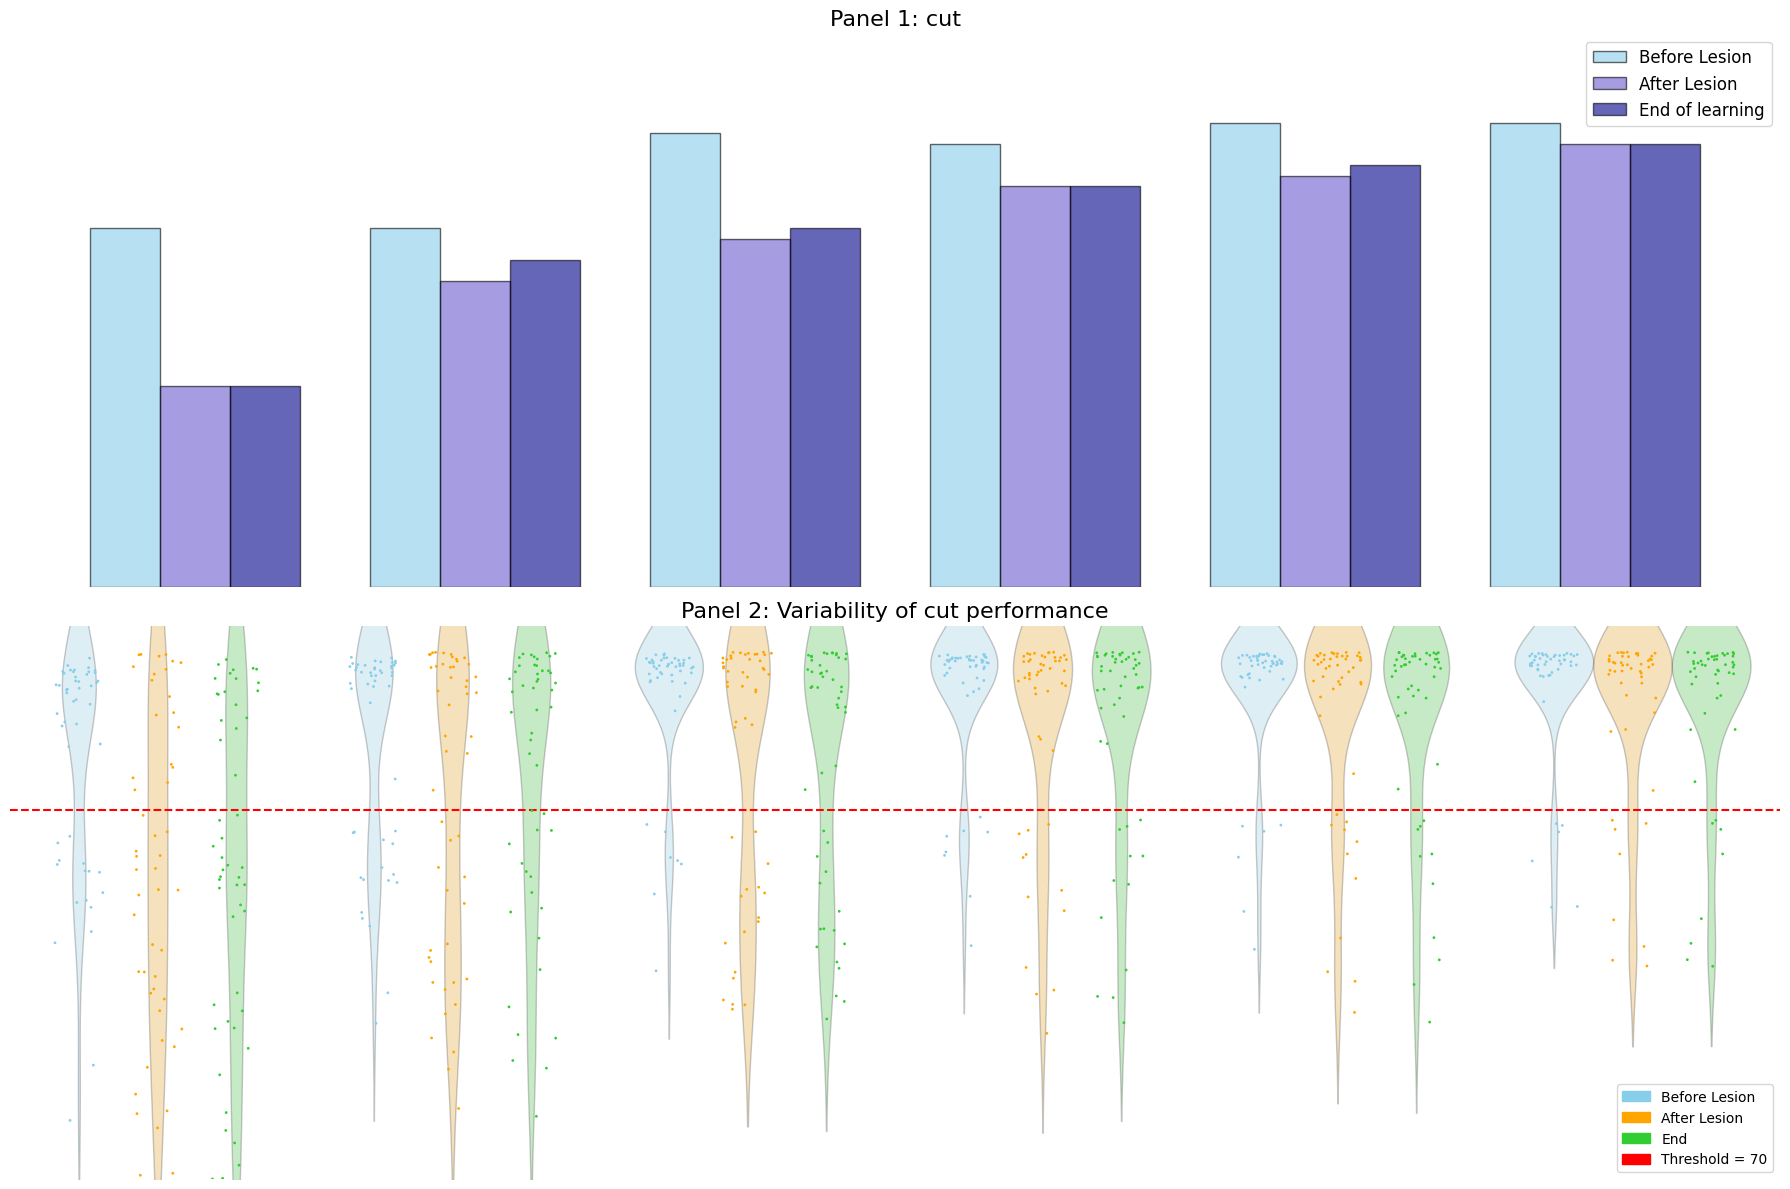

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

def plot_results_bar_3(data1, data2, data3, params, label, ax):
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]

    n_values = len(sorted_params)

    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

    bar_width = 0.25
    x = np.arange(n_values)

    ax.bar(x - bar_width, 100 * above_thresh1, width=bar_width, color='skyblue', alpha=0.6, edgecolor='black', label='Before Lesion')
    ax.bar(x,             100 * above_thresh2, width=bar_width, color='slateblue', alpha=0.6, edgecolor='black', label='After Lesion')
    ax.bar(x + bar_width, 100 * above_thresh3, width=bar_width, color='darkblue', alpha=0.6, edgecolor='black', label='End of learning')

    ax.set_xlabel('Day of Lesion', fontsize=14)
    ax.set_ylabel('% of trials finding global maxima', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels([int(p+30) for p in sorted_params], fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0, 105)
    ax.legend(fontsize=12)
    ax.set_title(f"Panel 1: {label}", fontsize=16)


def plot_results_violin_3(data1, data2, data3, params, label, ax):
    data1 = np.array(data1) * 100
    data2 = np.array(data2) * 100
    data3 = np.array(data3) * 100

    sorted_params = np.array(sorted(params))
    sorted_indices = np.argsort(params)

    data1 = data1[:, sorted_indices]
    data2 = data2[:, sorted_indices]
    data3 = data3[:, sorted_indices]

    n_values = len(sorted_params)

    above_thresh1 = np.zeros(n_values)
    above_thresh2 = np.zeros(n_values)
    above_thresh3 = np.zeros(n_values)

    data_flat1, data_flat2, data_flat3 = [], [], []
    labels_list = []

    for i in range(n_values):
        col1 = data1[:, i]
        col2 = data2[:, i]
        col3 = data3[:, i]

        above_thresh1[i] = np.sum(col1 > 70) / len(col1)
        above_thresh2[i] = np.sum(col2 > 70) / len(col2)
        above_thresh3[i] = np.sum(col3 > 70) / len(col3)

        data_flat1.extend(col1)
        data_flat2.extend(col2)
        data_flat3.extend(col3)

        labels_list.extend([int(sorted_params[i]+30)] * len(col1))

    # Convert to DataFrame-like for seaborn
    import pandas as pd
    df = pd.DataFrame({
        'Param': labels_list * 3,
        'Return %': data_flat1 + data_flat2 + data_flat3,
        'Condition': ['Before'] * len(data_flat1) + ['After'] * len(data_flat2) + ['End'] * len(data_flat3)
    })

    sns.violinplot(data=df, x='Param', y='Return %', hue='Condition', ax=ax, split=False, inner=None, linewidth=1, alpha=0.3, palette={'Before': 'skyblue', 'After': 'orange', 'End': 'limegreen'})
    sns.stripplot(data=df, x='Param', y='Return %', hue='Condition', ax=ax, size=2, jitter=0.25, dodge=True, palette={'Before': 'skyblue', 'After': 'orange', 'End': 'limegreen'}, legend=False)

    ax.axhline(70, color='red', linestyle='--')
    ax.set_xlabel('Parameter set', fontsize=14)
    ax.set_ylabel('Return %', fontsize=14)
    ax.set_ylim(0, 105)
    ax.set_title(f"Panel 2: Variability of {label} performance", fontsize=16)

    handles = [
        mpatches.Patch(color='skyblue', label='Before Lesion'),
        mpatches.Patch(color='orange', label='After Lesion'),
        mpatches.Patch(color='limegreen', label='End'),
        mpatches.Patch(color='red', label='Threshold = 70')
    ]
    ax.legend(handles=handles, fontsize=10)

# def plot_rewards()

# =================
# Create the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Panel 1 (Top-left)
plot_results_bar_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut",
    ax=axs[0]
)

# Panel 2 (Top-right)
plot_results_violin_3(
    data_b4cut['BG_INTACT_DAYS'],
    data_aftercut['BG_INTACT_DAYS'],
    data_end['BG_INTACT_DAYS'],
    parameter_values['BG_INTACT_DAYS'],
    label="cut",
    ax=axs[1]
)

# Leave Panel 3 and 4 empty for now
axs[0].axis('off')
axs[1].axis('off')

plt.tight_layout()
plt.show()


TypeError: plot_results_bar_3() got an unexpected keyword argument 'ax'

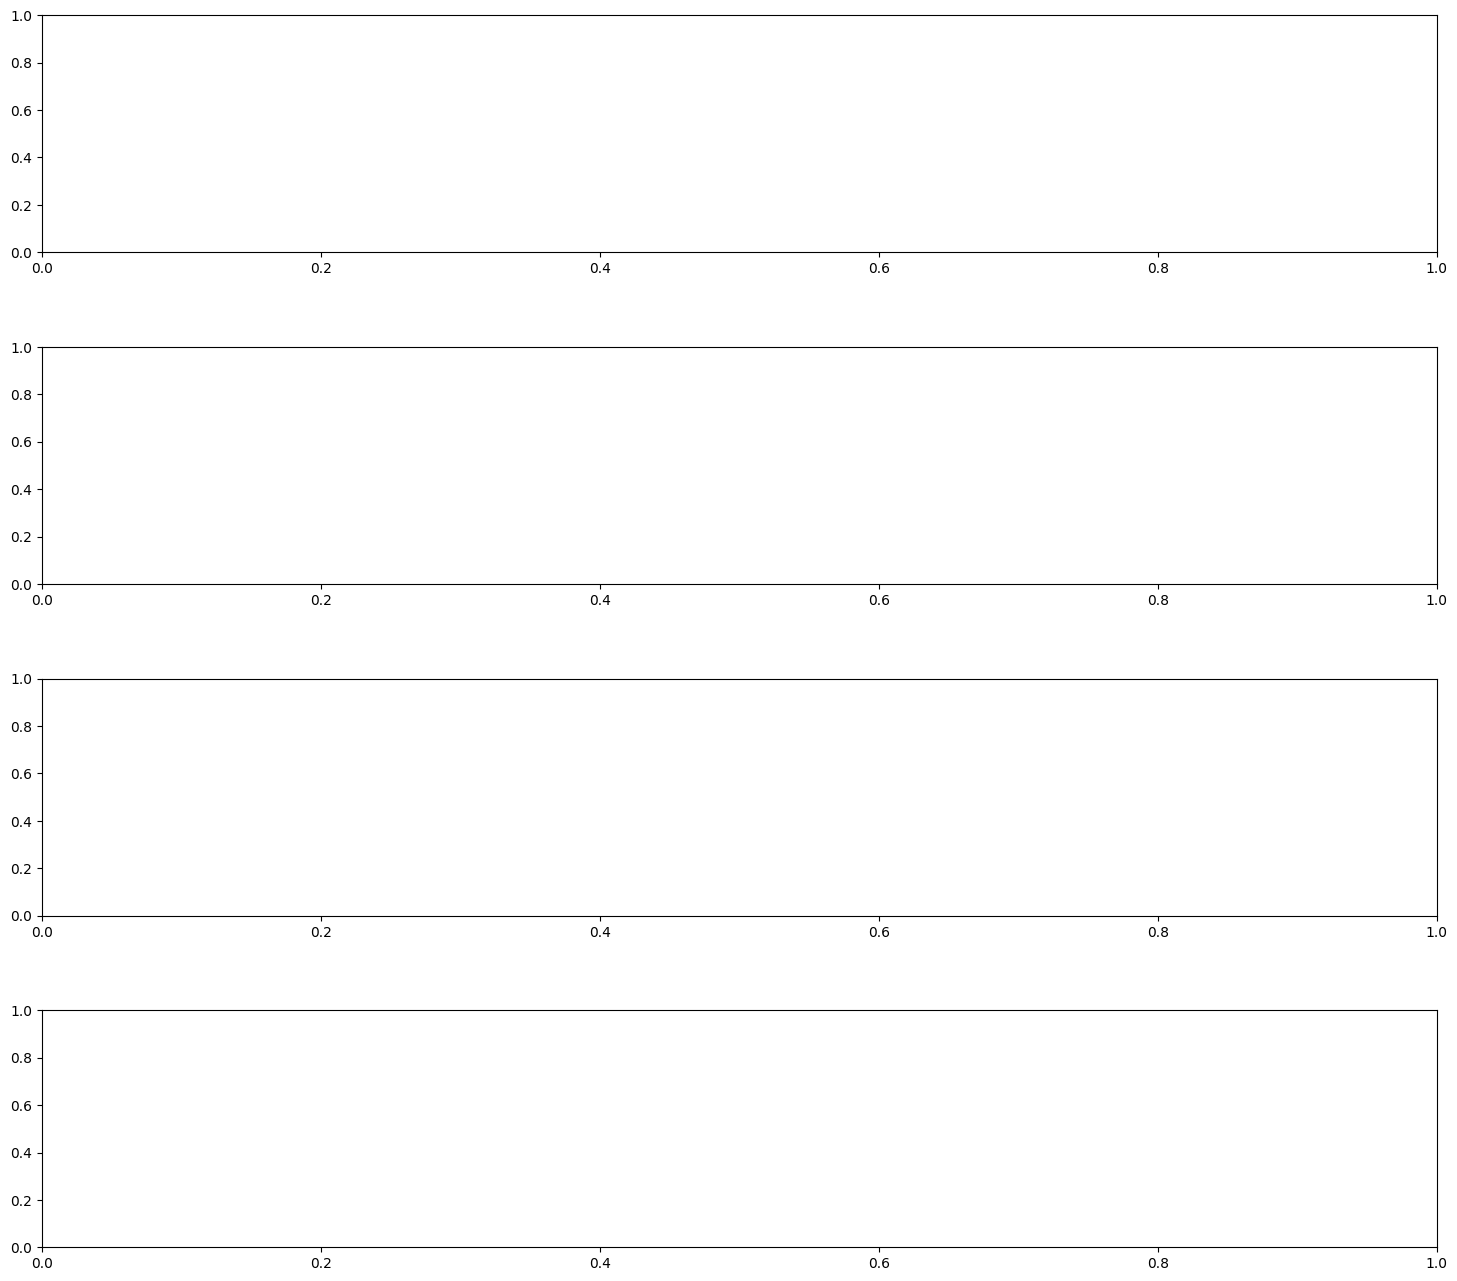

In [ ]:
# def plot_returns(data, key):
width = 0.055
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(10,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(np.arange(n_values)+width, 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.1, color='b')
        plt.bar(np.arange(n_values)-width, 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.1, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        # plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.tight_layout()
        plt.legend()
        plt.show()

NameError: name 'data_cut' is not defined

[0.05, 0.075, 0.1, 0.15, 0.2]


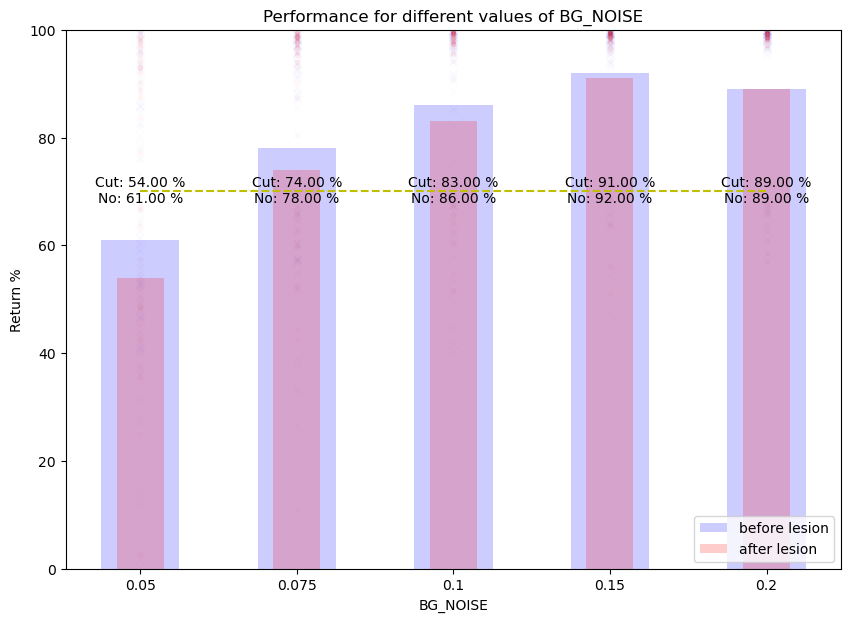

In [ ]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in wanted_directories:
        param = directory
        returns_cut = 100 * data_cut[directory]
        returns_no_cut = 100 * data_no_cut[directory]
        # is returns cut and no cut same? 
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        print(parameter_values_sorted)
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns_cut = returns_cut[:, sorted_indices]
        returns_no_cut = returns_no_cut[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold_cut = np.zeros(n_values)
        above_threshold_no_cut = np.zeros(n_values)
        for i in range(n_values):
            above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
            above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

        above_threshold_cut /= returns_cut.shape[0]
        above_threshold_no_cut /= returns_no_cut.shape[0]
        plt.figure(figsize=(10,7))
        # means = #np.mean(returns_cut, axis=0)

        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.5, color='b')
        plt.bar(range(n_values), 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.3, color='r')
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
            plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
            plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()

Base model parameters
1. `JUMP_MID` = 0.6
2. `JUMP_SLOPE` >= 50 /* higher jump slope causes the night jump to pause when above threshold. Leading to stable model. */
3. `BG_NOISE` anything between 0.05 - 0.15 
4. `REWARD_WINDOW` = 5
5. `LEARNING_RATE_RL` = 0.2 best; 0.1 okay